In [62]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [63]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(128), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 32

In [64]:
train_dataset = datasets.ImageFolder('../data/train_medium_aug_2/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [65]:
val_dataset = datasets.ImageFolder('../data/val_medium_aug_2/', transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

classes = ('footway', 'primary')

In [83]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 3 input image channel, 6 output channels, 5x5 square convolution

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 29 * 29, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))             
        x = self.fc3(x)
        return x

net = Net()

In [84]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [85]:
loss_values = []
type(loss_values)

accuracy = []
type(accuracy)

loss_values.append(1)
accuracy.append(1)

In [86]:
def double_check_accuracy():
    
    running_loss = 0.0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            
            # calculate outputs by running images through the network            
            outputs = net(images)            
            loss = criterion(outputs, labels)

            # print statistics
            running_loss += loss.item() 
            
    accuracy.append(running_loss / len(val_loader))
    print(f'Loss on the validation set { running_loss / len(val_loader) }')

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    print(len(train_loader))
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()        
        if i % 20 == 19:    # print every 2000 mini-batches            
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

    loss_values.append(running_loss / 20)
    double_check_accuracy()    

print('Finished Training')

63
[1,    20] loss: 0.692
[1,    40] loss: 0.687
[1,    60] loss: 0.684
Loss on the validation set 0.6782421916723251
63
[2,    20] loss: 0.677
[2,    40] loss: 0.671
[2,    60] loss: 0.654
Loss on the validation set 0.6488051414489746
63
[3,    20] loss: 0.643
[3,    40] loss: 0.616
[3,    60] loss: 0.621
Loss on the validation set 0.5844653025269508
63
[4,    20] loss: 0.578
[4,    40] loss: 0.547
[4,    60] loss: 0.552
Loss on the validation set 0.5141466353088617
63
[5,    20] loss: 0.550
[5,    40] loss: 0.510
[5,    60] loss: 0.433
Loss on the validation set 0.4423394799232483
63
[6,    20] loss: 0.469
[6,    40] loss: 0.425
[6,    60] loss: 0.394
Loss on the validation set 0.4053979329764843
63
[7,    20] loss: 0.404
[7,    40] loss: 0.382
[7,    60] loss: 0.333
Loss on the validation set 0.39615115337073803
63
[8,    20] loss: 0.380
[8,    40] loss: 0.348
[8,    60] loss: 0.293
Loss on the validation set 0.3493433175608516
63
[9,    20] loss: 0.285
[9,    40] loss: 0.418
[9,   

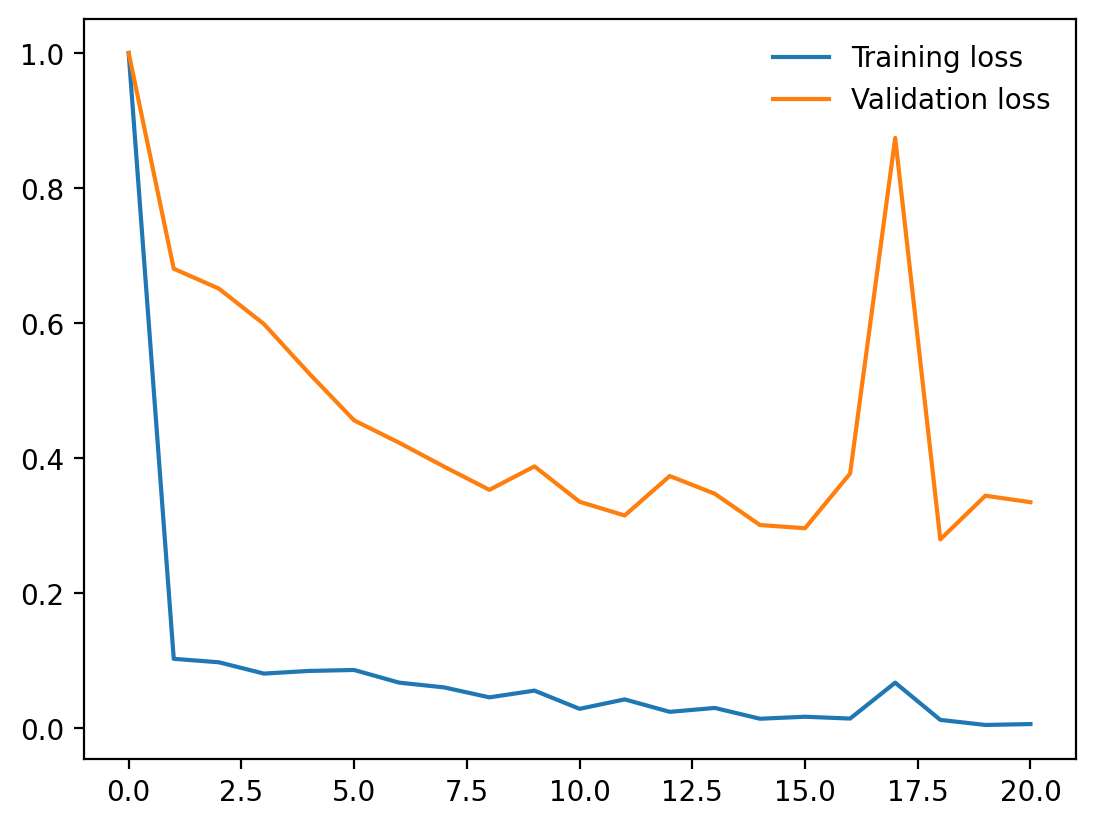

In [82]:
# plot the loss and accuracy and the validation loss and accuracy
plt.plot(loss_values, label='Training loss')
plt.plot(accuracy, label='Validation loss')
plt.legend(frameon=False)

plt.show()

In [71]:
PATH = './test_5.pth'
torch.save(net.state_dict(), PATH)

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("a", img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [73]:
print(len(val_loader))

16


a torch.Size([3, 522, 1042])


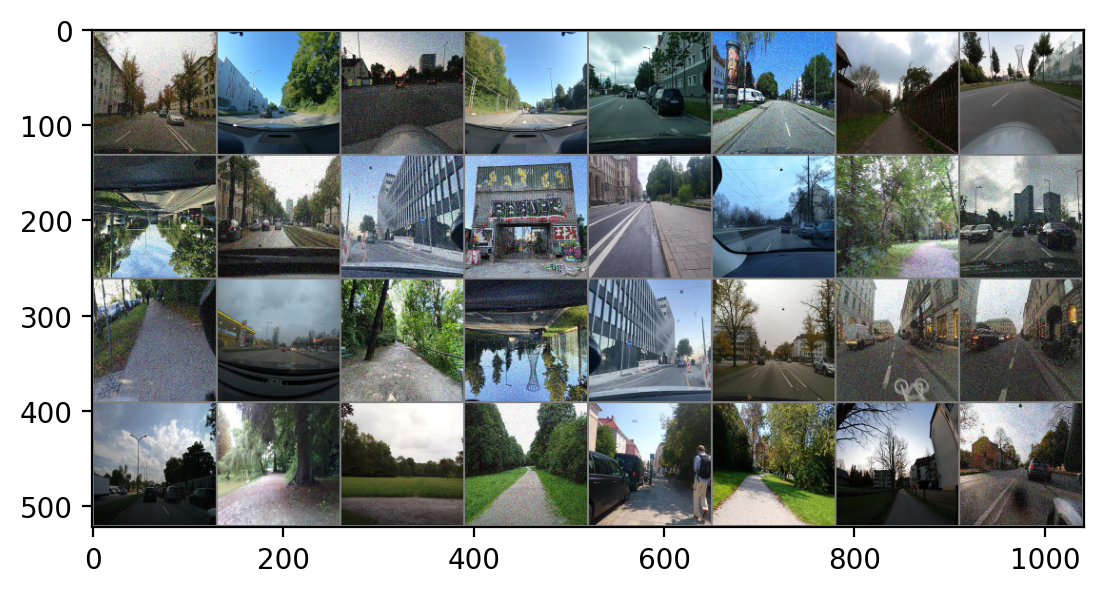

GroundTruth:  primary primary primary primary primary primary footway primary primary primary primary footway footway primary footway primary footway primary footway primary primary primary footway footway primary footway footway footway footway footway footway primary


In [75]:
dataiter = iter(val_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [32]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [76]:
outputs = net(images)

a torch.Size([3, 522, 1042])


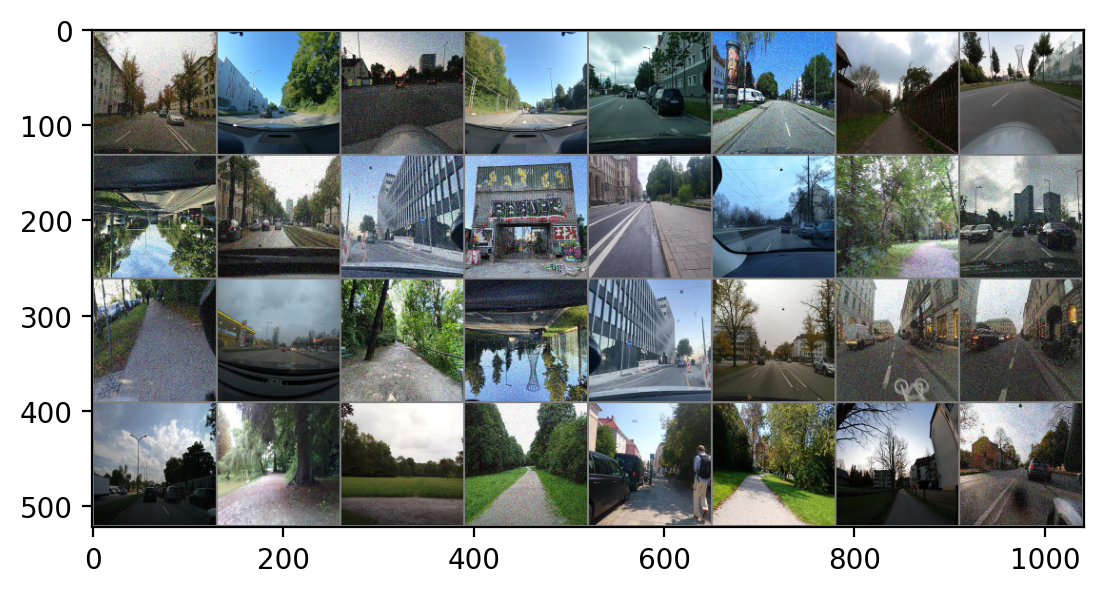

GroundTruth:  primary primary primary primary primary primary footway primary primary primary primary footway footway primary footway primary footway primary footway primary primary primary footway footway primary footway footway footway footway footway footway primary
Predicted:  primary primary primary primary primary primary primary footway primary primary footway footway footway primary footway primary footway primary footway primary footway primary primary primary primary footway primary footway footway footway primary primary


In [77]:
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

In [78]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    count = 0
    for data in val_loader:        
        count += 1        
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 83 %
